<a href="https://colab.research.google.com/github/RohitKumar23-11/Basic-TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating data to view and fit

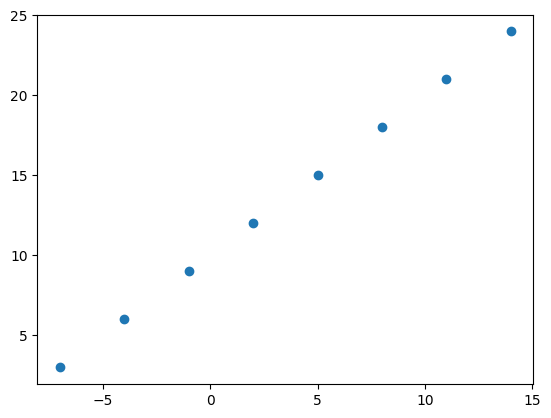

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

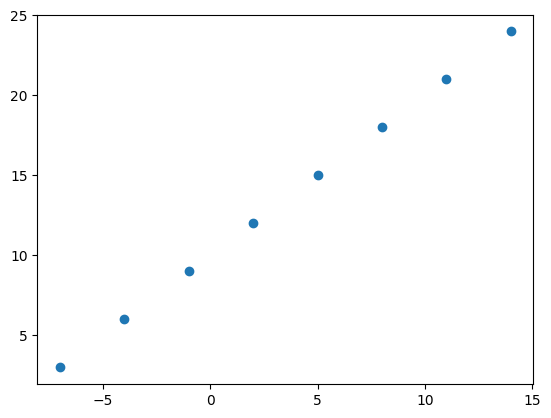

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensforFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learnining model.
2. Compiling a model - define the loss function (in other words, the function which tell our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels) .

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    #tf.keras.layers.Dense(1)
])

"""
1. Create a model using the Sequential API other way
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for Stochastic Gradient Descent
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 757ms/step - loss: 20.0491 - mae: 20.0491
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 19.7678 - mae: 19.7678
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 19.4866 - mae: 19.4866
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 19.2053 - mae: 19.2053
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 18.9241 - mae: 18.9241


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])

1/1 [==============================] - 0s 176ms/step


In [ ]:
y_pred

array([[-19.135035]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 716ms/step - loss: 18.0914 - mae: 18.0914
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 17.8101 - mae: 17.8101
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 17.5289 - mae: 17.5289
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 17.2476 - mae: 17.2476
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 16.9664 - mae: 16.9664
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 16.6851 - mae: 16.6851
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 16.4039 - mae: 16.4039
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 16.1226 - mae: 16.1226
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 15.8414 - mae: 15.8414
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 15.5601 - mae: 15.5601
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model

y_pred = model.predict([17.0, 19.0])
y_pred

1/1 [==============================] - 0s 125ms/step


array([[29.416613],
       [32.771805]], dtype=float32)

In [ ]:
#Let's rebuild our model
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (specified to your problem)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 14.8846 - mae: 14.8846
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 14.4973 - mae: 14.4973
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 14.1233 - mae: 14.1233
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 13.7724 - mae: 13.7724
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 13.4401 - mae: 13.4401
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 13.1392 - mae: 13.1392
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 12.8524 - mae: 12.8524
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 12.5799 - mae: 12.5799
Epoch 9/100
1/1 [==============================] - 0s 26ms/step - loss: 12.3239 - mae: 12.3239
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 12.0888 - mae: 12.0888
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0, 19.0])
y_pred

1/1 [==============================] - 0s 144ms/step


array([[31.298256],
       [34.728863]], dtype=float32)

In [ ]:
# Final model
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 852ms/step - loss: 14.4159 - mae: 14.4159
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8587 - mae: 13.8587
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3098 - mae: 13.3098
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 12.7611 - mae: 12.7611
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.2133 - mae: 12.2133
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6621 - mae: 11.6621
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 11.0959 - mae: 11.0959
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5129 - mae: 10.5129
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9300 - mae: 9.9300
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 9.3242 - mae: 9.3242
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_preds = model.predict([17.0])
y_preds

1/1 [==============================] - 0s 137ms/step


array([[32.493084]], dtype=float32)

In [ ]:
# another model with none activation
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 15.0581 - mae: 15.0581
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 14.4031 - mae: 14.4031
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 13.9741 - mae: 13.9741
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13.5489 - mae: 13.5489
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 13.1251 - mae: 13.1251
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.7007 - mae: 12.7007
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 12.2734 - mae: 12.2734
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 11.8410 - mae: 11.8410
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.4012 - mae: 11.4012
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 10.9520 - mae: 10.9520
Epoch 11/100
1/1 [==============================] -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 180ms/step


array([[28.346888]], dtype=float32)

In [ ]:
# Another model
# Set Random Seed
tf.random.set_seed(42)

# 1. Create a model (this time with an extra hidden layer with 100 hidden units)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 13.3885 - mae: 13.3885
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.3192 - mae: 13.3192
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2500 - mae: 13.2500
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.1807 - mae: 13.1807
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.1114 - mae: 13.1114
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0420 - mae: 13.0420
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9726 - mae: 12.9726
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9032 - mae: 12.9032
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8337 - mae: 12.8337
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7642 - mae: 12.7642
Epoch 11/100
1/1 [==============================

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 88ms/step


array([[32.042545]], dtype=float32)

🔑 The learning rate (lr) is one of the most important hyperparameter of many algorithms or models.

### Evaluting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visalize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

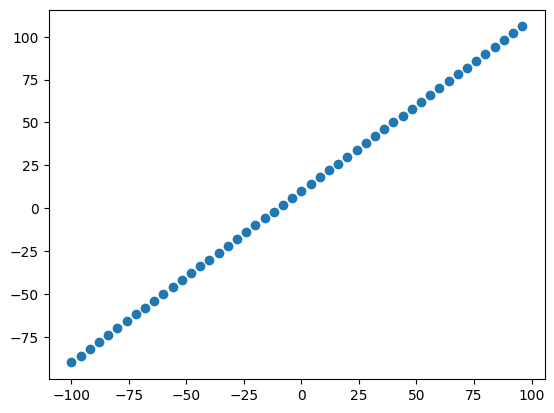

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80 % of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15 % of tha data available.
* Test set - the model gets evaluated on this data to test what is has learned , this set is typically 10-15 % of the total data available.

In [ ]:
# Check the lenght of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test =  X[40:] # last 10 are training samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

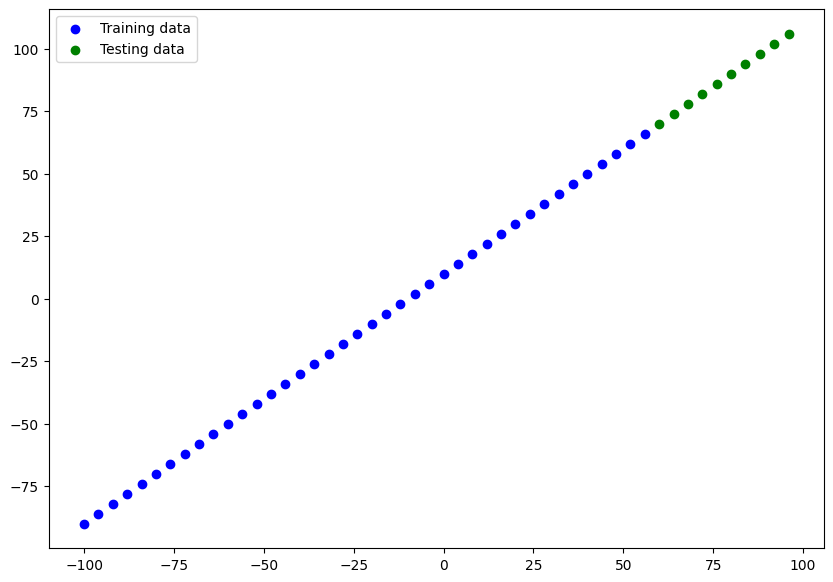

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c = "g", label="Testing data")
# Show legend
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
mode = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3.  Fit the model
#model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 50)                100       
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's create a model which build s automatically by defining the input_shape argument

tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

📖**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 53.5031 - mae: 53.5031
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 28.9762 - mae: 28.9762
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 33.1681 - mae: 33.1681
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 21.5170 - mae: 21.5170
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.3988 - mae: 14.3988
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.5356 - mae: 11.5356
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6156 - mae: 12.6156
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0569 - mae: 11.0569
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 39.8837 - mae: 39.8837
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.3563 - mae: 27.3563
Epoch 11/100
2/2 [==============================] - 0s 10m

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


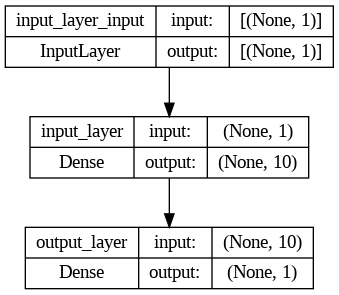

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 81ms/step


array([[ 76.25216 ],
       [ 81.22227 ],
       [ 86.19237 ],
       [ 91.162476],
       [ 96.13257 ],
       [101.10268 ],
       [106.072784],
       [111.042885],
       [116.01299 ],
       [120.98308 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's prediction
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


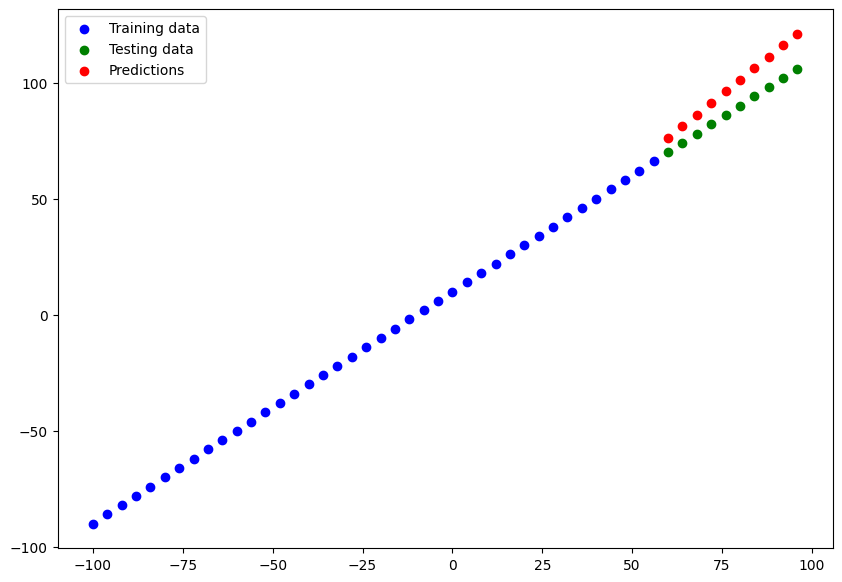

In [ ]:
plot_predictions(train_data = X_train,
                 train_labels=y_train,
                 test_data = X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error - "on average, how wrong is each of my model's predictions". `(As a great starter metric for any regression problem.)`
* MSE - mean square error - "square the average errors" `(When larger errors are more significant than smaller errors.)`

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 152ms/step - loss: 10.6176 - mae: 10.6176


[10.61762809753418, 10.61762809753418]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))

mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.448705 , 11.1110935, 10.       , 10.232495 , 11.653028 ,
       14.261606 , 18.072784 , 23.042885 , 28.012995 , 32.983078 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 76.25216 ],
       [ 81.22227 ],
       [ 86.19237 ],
       [ 91.162476],
       [ 96.13257 ],
       [101.10268 ],
       [106.072784],
       [111.042885],
       [116.01299 ],
       [120.98308 ]], dtype=float32)>

In [ ]:
y_test


<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 76.25216 ,  81.22227 ,  86.19237 ,  91.162476,  96.13257 ,
       101.10268 , 106.072784, 111.042885, 116.01299 , 120.98308 ],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.617625>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=120.49803>

In [ ]:
huber = tf.metrics.Huber(y_true=y_test,
                         y_pred=tf.squeeze(y_pred))
huber

AttributeError: ignored

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,#y_test
                                        y_pred= tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, #y_test
                                       y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model

```
Build a model -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it -> Tweak it -> Fit it -> Evaluate it ...
```
1. Get more data - get more example for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for layer - give your model more of a chance to find patterns in the data.


The Machine Leaning explorer's motto "Visualize, visualize, visualize"

The Machine Learning practitioner's motto
"Experiment, experiment, experiment"

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, train for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"]
                )

# 3. Fit the model
#model_1.fit(X_train, y_train, epochs=100, verbose=1)

model_1.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 46.0048 - mae: 46.0048
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 15.1193 - mae: 15.1193
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 14.3232 - mae: 14.3232
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 7.6887 - mae: 7.6887
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 9.1125 - mae: 9.1125
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5928 - mae: 8.5928
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0196 - mae: 9.0196
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0920 - mae: 9.0920
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.8568 - mae: 19.8568
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7364 - mae: 10.7364
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 51ms/step


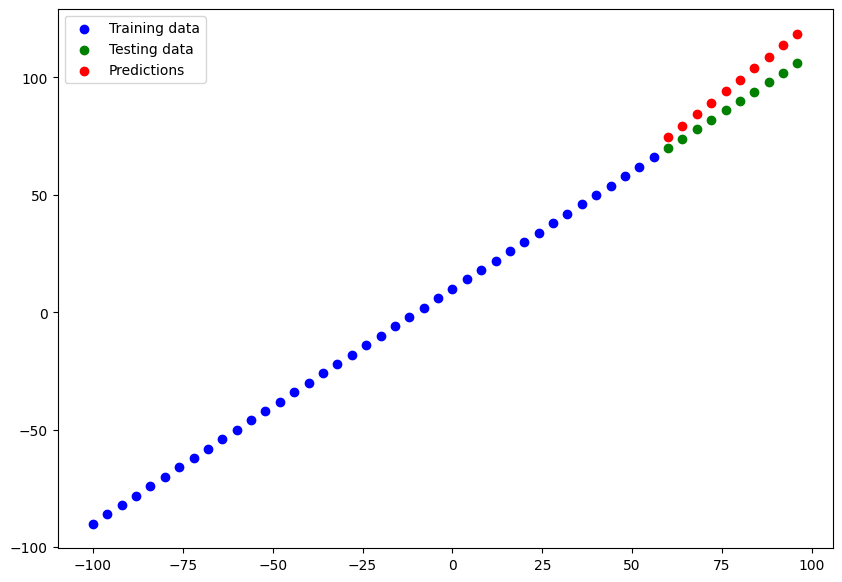

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.603948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.533264>)

**Build `model_2`**

* 2 Dense layers, trained for 100 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the mdoel
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 37.6116 - mse: 2007.9280
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 29.9183 - mse: 1259.6158
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 28.1196 - mse: 1186.7571
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 16.1397 - mse: 369.3286
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7183 - mse: 502.3905
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 14.2125 - mse: 286.5031
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.4990 - mse: 161.0247
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2343 - mse: 176.1488
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 41.9861 - mse: 2812.4302
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 29.1840 - mse: 1204.5190
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 87ms/step


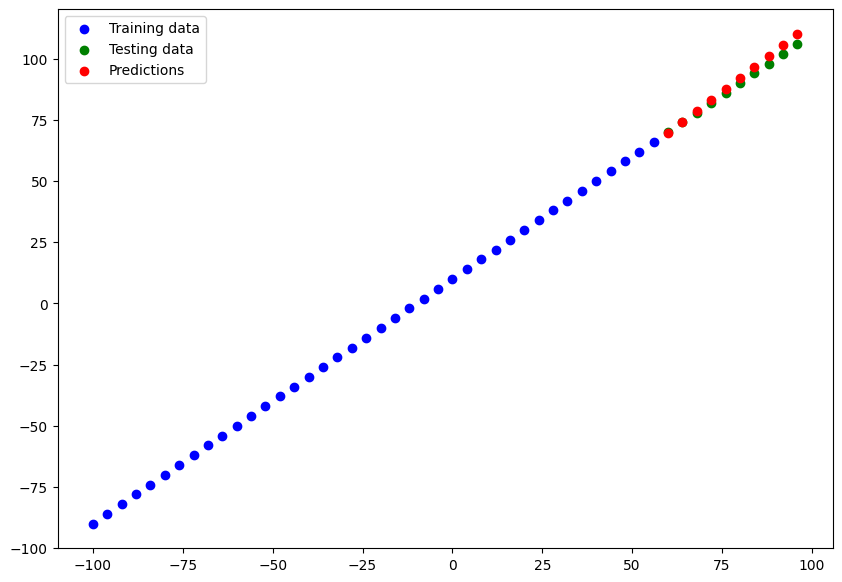

In [ ]:
# Make a plot predictions of model_2
y_preds_2 =  model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9348831>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.5834856>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500, verbose=1)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 82.0374 - mae: 82.0374
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 29.3787 - mae: 29.3787
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 20.2974 - mae: 20.2974
Epoch 4/500
2/2 [==============================] - 0s 9ms/step - loss: 13.1636 - mae: 13.1636
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 16.7664 - mae: 16.7664
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.3684 - mae: 11.3684
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 12.4146 - mae: 12.4146
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0053 - mae: 11.0053
Epoch 9/500
2/2 [==============================] - 0s 12ms/step - loss: 38.9259 - mae: 38.9259
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 26.5146 - mae: 26.5146
Epoch 11/500
2/2 [==============================] - 0s 7

1/1 [==============================] - 0s 109ms/step


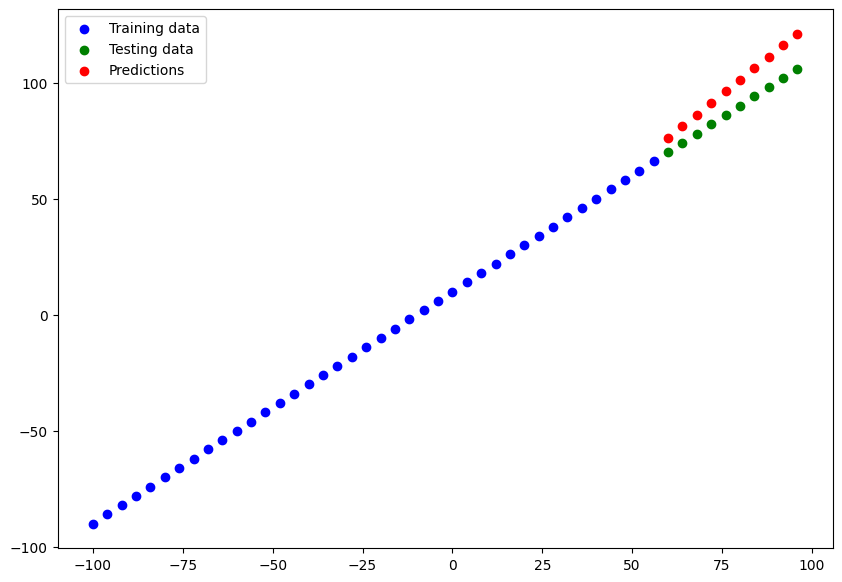

In [ ]:
# Make and plot some predictions
y_preds_3 = model.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=10.617625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.49803>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

we've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae","mse"])
all_results

,model,mae,mse
0,model_1,8.603948,80.533264
1,model_2,1.934883,5.583486
2,model_3,10.617625,120.498032


Looks like `model_2` perfomed the best...

In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figure out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!!

📖**Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.


There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [ ]:
# Load in the SavedModel format model
loaded_SaveModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SaveModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 183ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Compare the MAE of model_2 preds and loaded_SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 55ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".

2. Use code (see the cell below).

3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow

In [ ]:
!ls /content/drive/MyDrive/TensorFlow

best_model_HDF5_format.h5


### A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot  = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile a model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
#insurance_model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8617.8525 - mae: 8617.8525
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.2017 - mae: 7886.2017
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.3643 - mae: 7589.3643
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7686.8589 - mae: 7686.8589
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7672.5293 - mae: 7672.5293
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7645.1880 - mae: 7645.1880
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7535.8945 - mae: 7535.8945
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7692.9634 - mae: 7692.9634
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7571.3740 - mae: 7571.3740
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7697.3037 - mae: 7697.3037

In [ ]:
model_2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7192.2827 - mae: 7192.2827


[7192.28271484375, 7192.28271484375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but train for longer (200 epochs)
3. same as above but with one extra hidden unit and train for much longer (350 epochs)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. train the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13299.6973 - mae: 13299.6973
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13154.1543 - mae: 13154.1543
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12845.2227 - mae: 12845.2227
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12230.8896 - mae: 12230.8896
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11171.8574 - mae: 11171.8574
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9746.9453 - mae: 9746.9453
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8357.2061 - mae: 8357.2061
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7593.8628 - mae: 7593.8628
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7438.8481 - mae: 7438.8481
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7415.8398 - mae:

In [ ]:
# Evaluate the larger mode
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4967.5234 - mae: 4967.5234


[4967.5234375, 4967.5234375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7192.2827 - mae: 7192.2827


[7192.28271484375, 7192.28271484375]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13296.5195 - mae: 13296.5195
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13156.9443 - mae: 13156.9443
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12853.8936 - mae: 12853.8936
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12242.6211 - mae: 12242.6211
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11185.5410 - mae: 11185.5410
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9756.8779 - mae: 9756.8779
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8360.3887 - mae: 8360.3887
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7591.5420 - mae: 7591.5420
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7433.9487 - mae: 7433.9487
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7410.9019 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3501.2002 - mae: 3501.2002


[3501.2001953125, 3501.2001953125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 7192.2827 - mae: 7192.2827


[7192.28271484375, 7192.28271484375]

Text(0.5, 0, 'epochs')

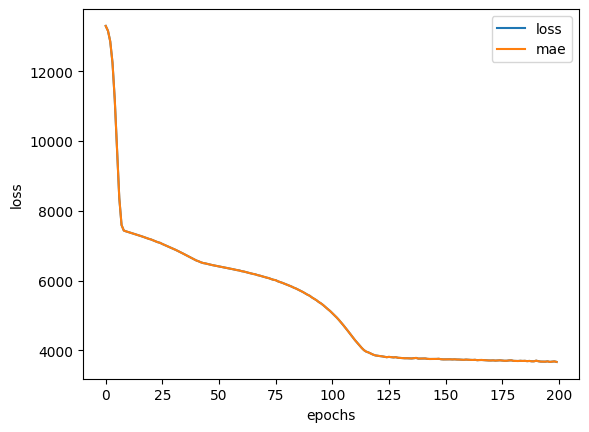

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. train the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_4.fit(X_train, y_train, epochs=350)

Epoch 1/350
34/34 [==============================] - 2s 4ms/step - loss: 13158.9805 - mae: 13158.9805
Epoch 2/350
34/34 [==============================] - 0s 4ms/step - loss: 12013.0039 - mae: 12013.0039
Epoch 3/350
34/34 [==============================] - 0s 3ms/step - loss: 8658.8916 - mae: 8658.8916
Epoch 4/350
34/34 [==============================] - 0s 2ms/step - loss: 7420.1997 - mae: 7420.1997
Epoch 5/350
34/34 [==============================] - 0s 2ms/step - loss: 7345.0762 - mae: 7345.0762
Epoch 6/350
34/34 [==============================] - 0s 2ms/step - loss: 7308.5181 - mae: 7308.5181
Epoch 7/350
34/34 [==============================] - 0s 2ms/step - loss: 7245.5269 - mae: 7245.5269
Epoch 8/350
34/34 [==============================] - 0s 2ms/step - loss: 7192.7642 - mae: 7192.7642
Epoch 9/350
34/34 [==============================] - 0s 2ms/step - loss: 7138.8755 - mae: 7138.8755
Epoch 10/350
34/34 [==============================] - 0s 3ms/step - loss: 7084.2568 - mae: 7084.

In [ ]:
# Evaluate the model
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3175.5422 - mae: 3175.5422


[3175.542236328125, 3175.542236328125]

Text(0.5, 0, 'epochs')

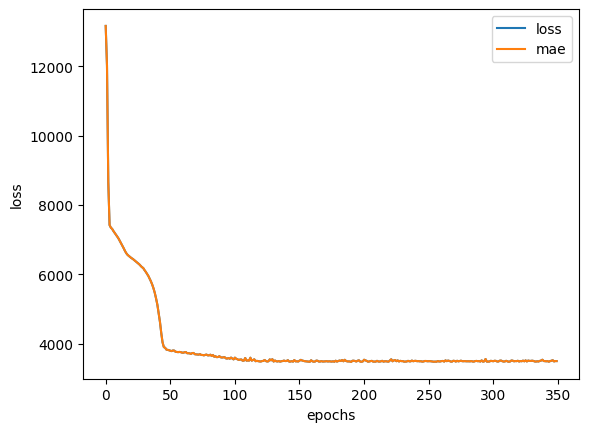

In [ ]:
# Plot history
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel('epochs')

> 🤔 **Question:** How long should you train for?

It depends. Really... it depends on problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is TensforFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

<Axes: ylabel='Frequency'>

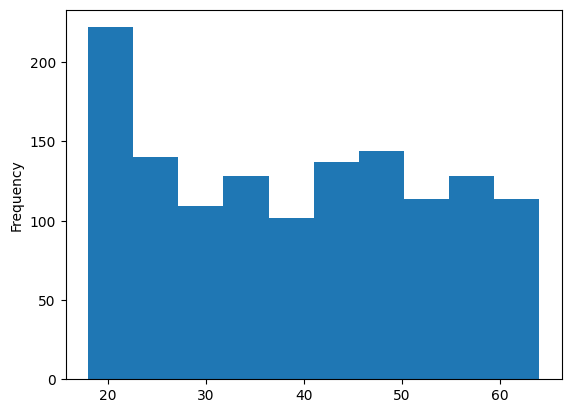

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

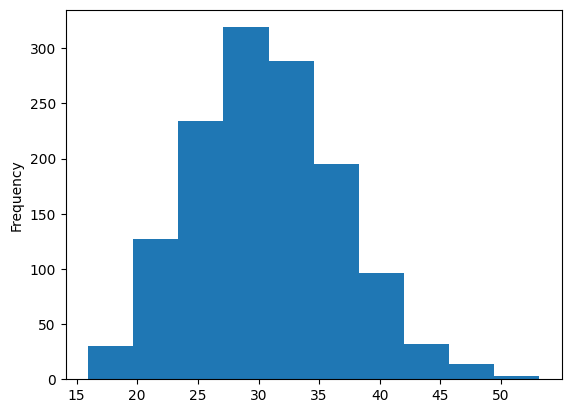

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


TO prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between o and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker","region"])
    )

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [ ]:
# what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [ ]:
insurance_model_4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 100)               1200      
                                                                 
 dense_54 (Dense)            (None, 50)                5050      
                                                                 
 dense_55 (Dense)            (None, 10)                510       
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,771
Trainable params: 6,771
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Build a neural network model to fit on our normalized data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
normalize_insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
normalize_insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# 3. Fit the model
history = normalize_insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13340.9951 - mae: 13340.9951
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13294.7188 - mae: 13294.7188
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13066.2070 - mae: 13066.2070
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12317.4902 - mae: 12317.4902
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10680.9785 - mae: 10680.9785
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8809.3750 - mae: 8809.3750
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7986.0820 - mae: 7986.0820
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7811.8857 - mae: 7811.8857
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7669.3154 - mae: 7669.3154
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7523.9761 - mae:

In [ ]:
normalize_insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3158.4373 - mae: 3158.4373


[3158.437255859375, 3158.437255859375]

Text(0.5, 0, 'epochs')

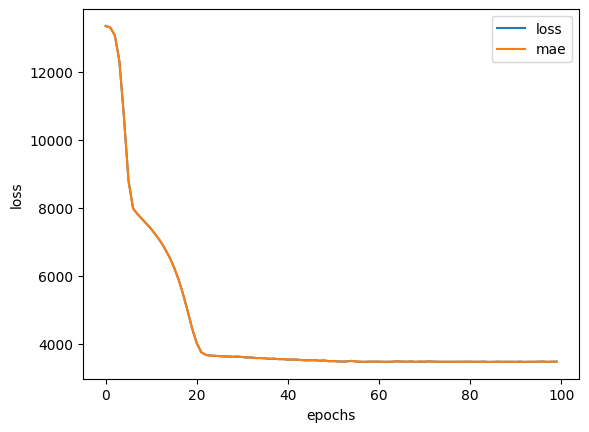

In [ ]:
# Plot the model
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")